In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv('../data/winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
df = df.fillna(df.mean())
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Exploratory Data Analysis

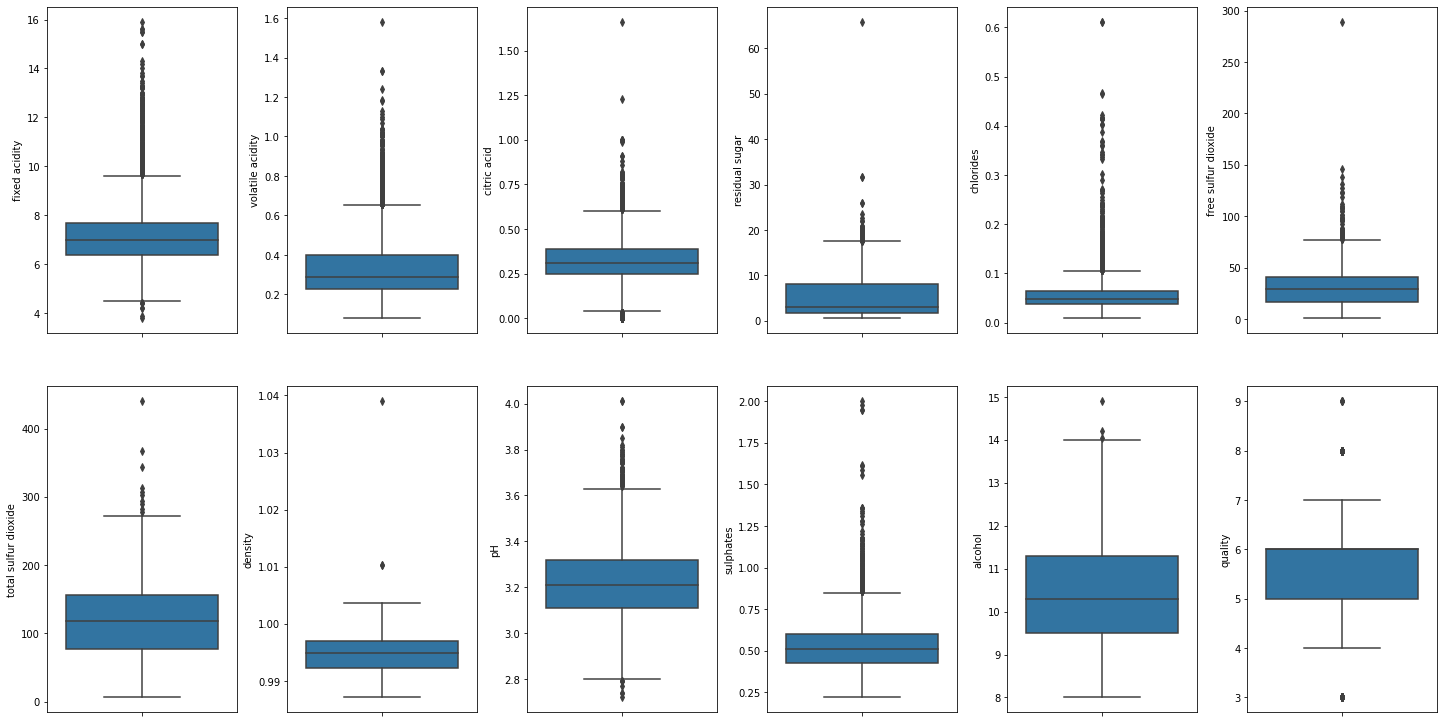

In [7]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

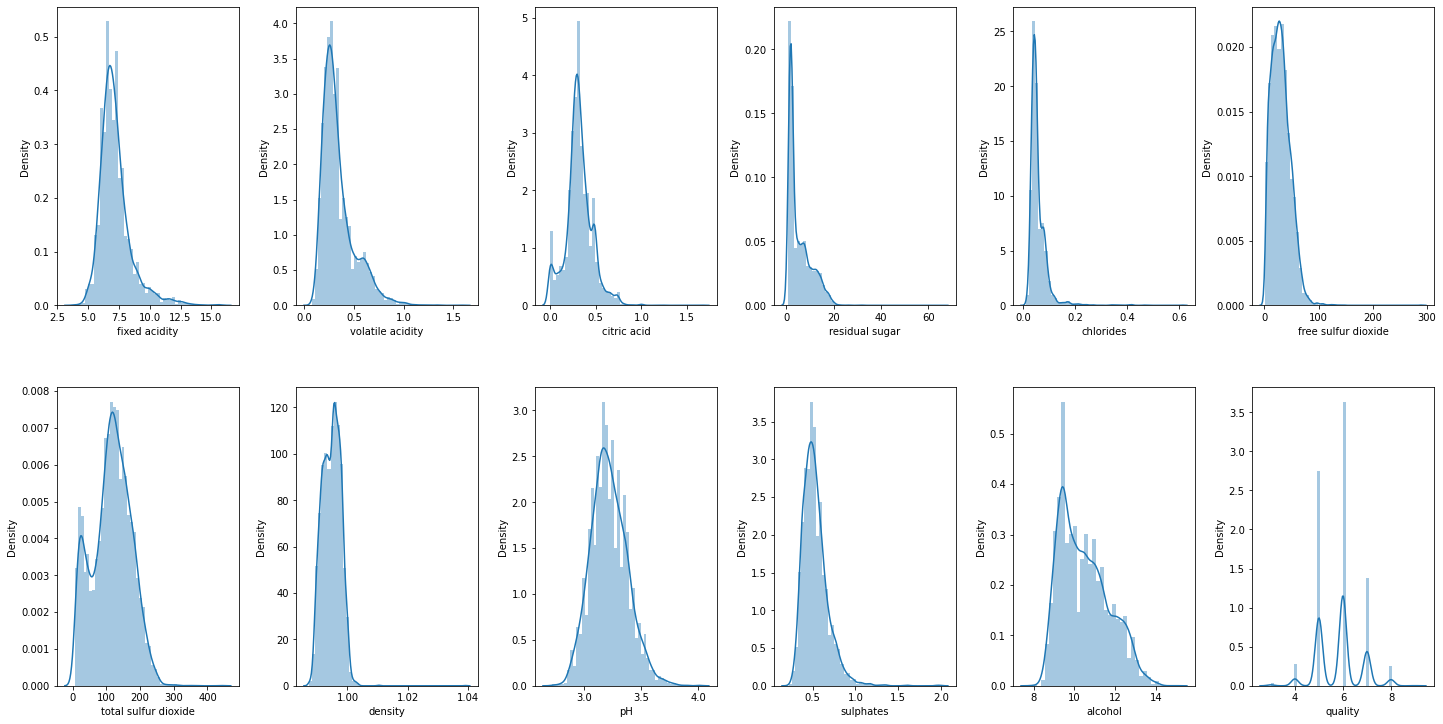

In [8]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [9]:
cd ..

/home/hrach2003/Projects/HTI_ML/WineQuality/WineQualityML/src


In [58]:
from utils import classify, drop_outliers
from models import Classifier

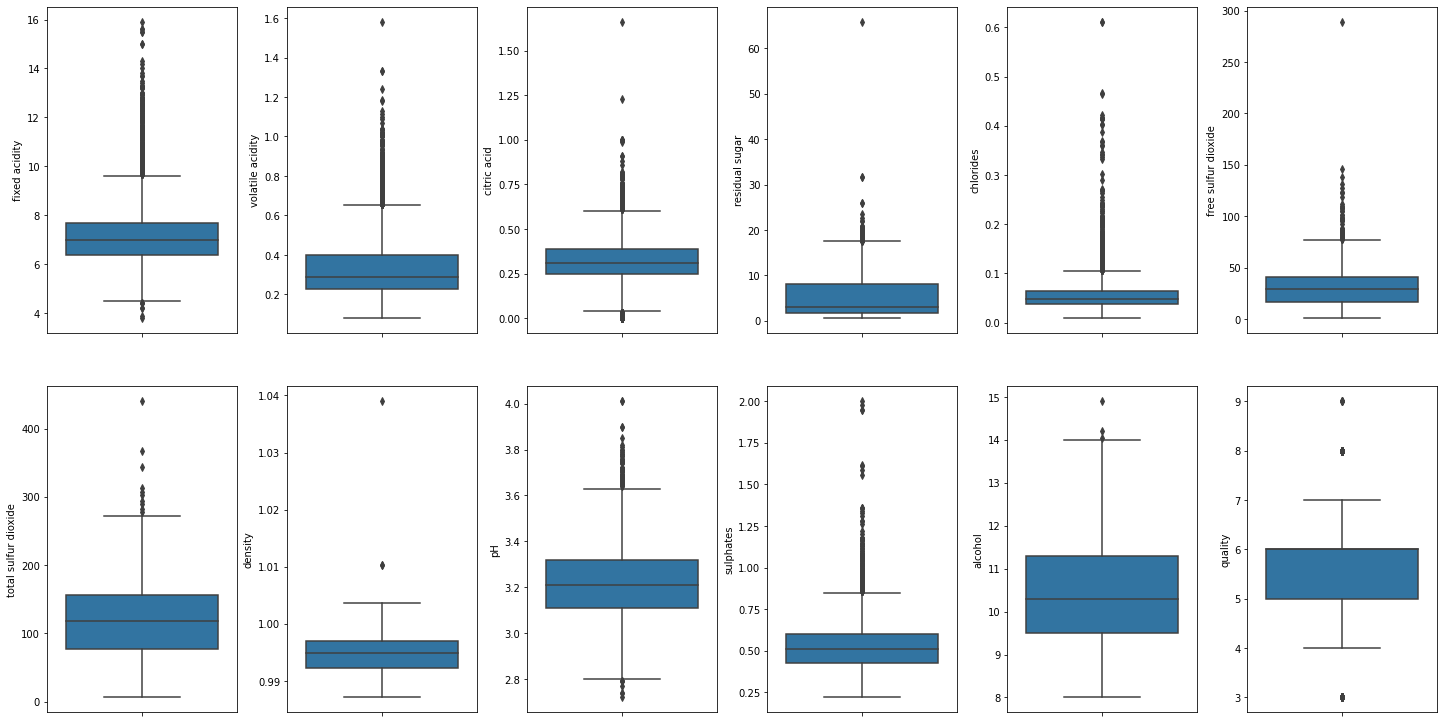

In [11]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

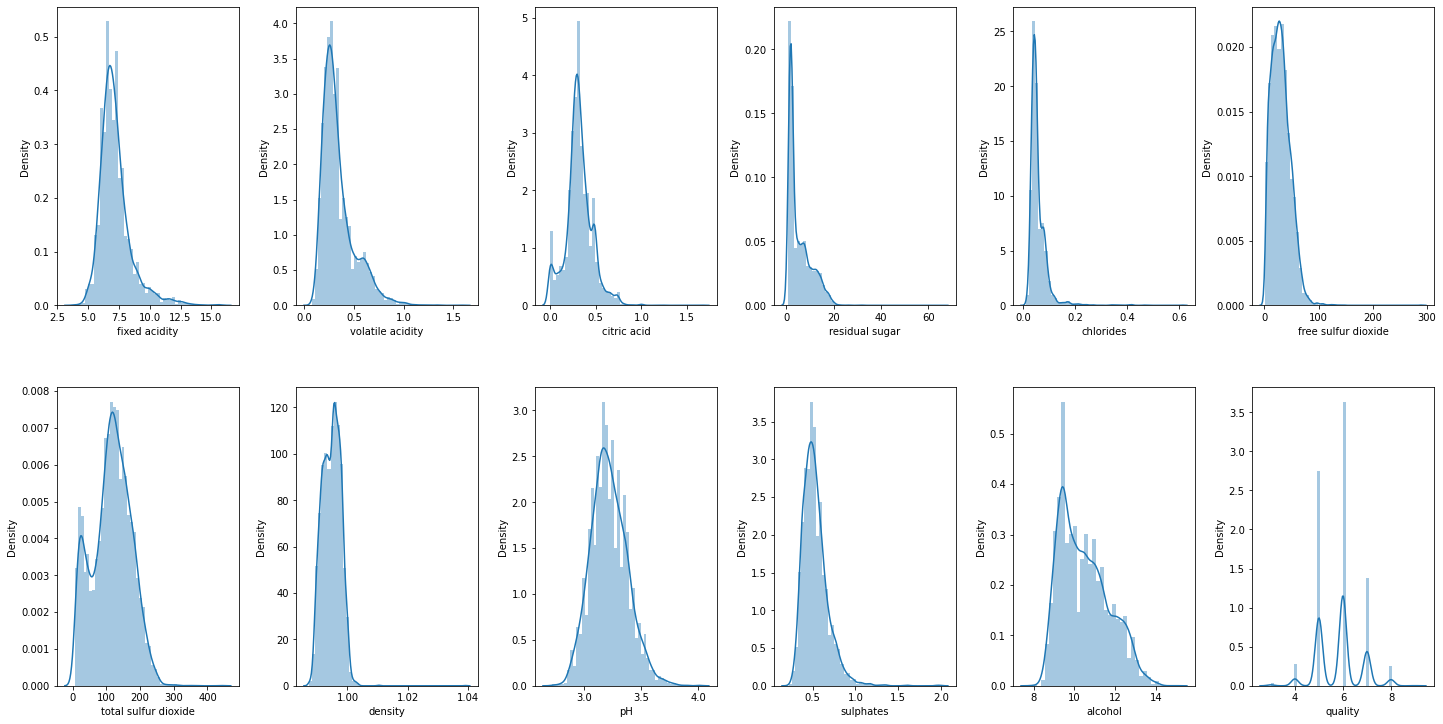

In [12]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<AxesSubplot:xlabel='type', ylabel='count'>

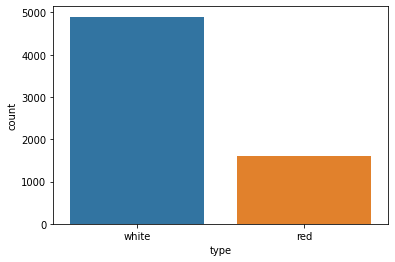

In [13]:
sns.countplot(df['type'])

<AxesSubplot:xlabel='quality', ylabel='count'>

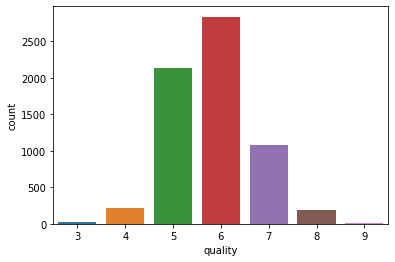

In [14]:
sns.countplot(df['quality'])

## Correlation Matrix

<AxesSubplot:>

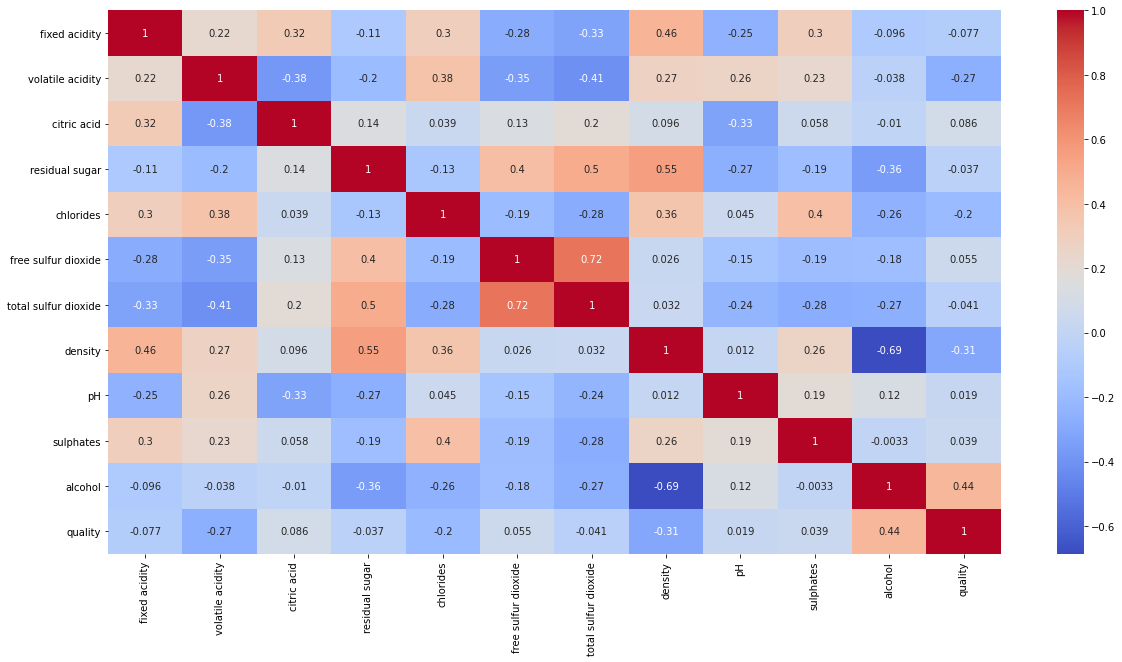

In [15]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Input Split

We may try to drop ***free sulfur dioxide and density*** for high correlation,
but the final results will be lower.

In [16]:
X = df.drop(columns=['type', 'quality'])
y = df['quality']

## Class Imbalancement

Becouse of data imbalancement we need to do one of them
- oversampling 
- undersampling

In [17]:
y.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [18]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, y = oversample.fit_resample(X, y)

In [19]:
y.value_counts()

3    2836
4    2836
5    2836
6    2836
7    2836
8    2836
9    2836
Name: quality, dtype: int64

This dataset will be perfect for **Trees Family**, but with higher chance of overfitting

## Picking Models 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
classifier = Classifier(
        LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), 
        RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier()
        )

['LogisticRegression()', 'KNeighborsClassifier()', 'DecisionTreeClassifier()', 'RandomForestClassifier()', 'ExtraTreesClassifier()', 'GradientBoostingClassifier()']


In [60]:
classifier.fit(x_train, y_train)

{'LogisticRegression()': LogisticRegression(),
 'KNeighborsClassifier()': KNeighborsClassifier(),
 'DecisionTreeClassifier()': DecisionTreeClassifier(),
 'RandomForestClassifier()': RandomForestClassifier(),
 'ExtraTreesClassifier()': ExtraTreesClassifier(),
 'GradientBoostingClassifier()': GradientBoostingClassifier()}

In [25]:
y_pred_arr = classifier.predict(x_test)

for y_pred, name in y_pred_arr:
    print(name)
    print(classification_report(y_pred, y_test))


LogisticRegression()
              precision    recall  f1-score   support

           3       0.34      0.24      0.28       828
           4       0.48      0.38      0.43       715
           5       0.17      0.23      0.20       414
           6       0.05      0.18      0.07       149
           7       0.06      0.16      0.09       209
           8       0.40      0.40      0.40       610
           9       0.67      0.34      0.45      1046

    accuracy                           0.31      3971
   macro avg       0.31      0.28      0.27      3971
weighted avg       0.42      0.31      0.34      3971

KNeighborsClassifier()
              precision    recall  f1-score   support

           3       0.97      0.85      0.91       660
           4       0.93      0.74      0.83       718
           5       0.50      0.63      0.56       457
           6       0.33      0.59      0.43       325
           7       0.78      0.74      0.76       596
           8       0.95      0.88 

In [47]:
results = {
    'Accuracy': [],
    "CV Score": []
}
for name, score in classifier.CV_score(X, y):
    print(name, score)
    results['CV Score'].append(score)
    
print('-----------')    
for name, score in classifier.score(x_test, y_test):
    print(name, score)
    results['Accuracy'].append(score)

    


LogisticRegression() 31.21584002912806
KNeighborsClassifier() 75.48873412847679
DecisionTreeClassifier() 75.43833472778398
RandomForestClassifier() 82.53074716125157
ExtraTreesClassifier() 83.18056666499629
GradientBoostingClassifier() 69.90739917297131
-----------
LogisticRegression() 30.77310501133216
KNeighborsClassifier() 78.21707378494082
DecisionTreeClassifier() 81.2641651976832
RandomForestClassifier() 88.84411986905062
ExtraTreesClassifier() 89.9017879627298
GradientBoostingClassifier() 72.62654243263663


In [48]:
model_results = pd.DataFrame.from_dict(results).T
model_results.columns = classifier._names

In [49]:
px.bar(model_results.sort_values(by=['Accuracy'], axis=1).T, y="Accuracy")

In [50]:
px.bar(model_results.sort_values(by=['CV Score'], axis=1).T, y="CV Score")

## Removing not suitable models

In [71]:
classifier.drop_models('LogisticRegression()', 'KNeighborsClassifier()', 'GradientBoostingClassifier()', 'DecisionTreeClassifier()')

dict_keys(['RandomForestClassifier()', 'ExtraTreesClassifier()'])

## Feature Importance

In [76]:
from pprint import pprint

res = pd.DataFrame(columns=classifier._names)

for name, model in classifier.get_models().items():
    print(name)
    pprint(model.feature_importances_)
    res[name] = model.feature_importances_

RandomForestClassifier()
array([0.09459558, 0.08704794, 0.07523527, 0.06908699, 0.12019901,
       0.10560374, 0.09884791, 0.08039474, 0.08761695, 0.07088429,
       0.11048757])
ExtraTreesClassifier()
array([0.08921228, 0.09202911, 0.07434812, 0.07876631, 0.08880187,
       0.10445246, 0.10205569, 0.08765351, 0.08316416, 0.07472627,
       0.12479024])


In [94]:
res.index = df.columns.values[1:-1]
res

,RandomForestClassifier(),ExtraTreesClassifier()
fixed acidity,0.094596,0.089212
volatile acidity,0.087048,0.092029
citric acid,0.075235,0.074348
residual sugar,0.069087,0.078766
chlorides,0.120199,0.088802
free sulfur dioxide,0.105604,0.104452
total sulfur dioxide,0.098848,0.102056
density,0.080395,0.087654
pH,0.087617,0.083164
sulphates,0.070884,0.074726


In [97]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, shared_yaxes=True)


fig.add_trace(go.Bar(x=res.index, y=res['RandomForestClassifier()']), 1,1)

fig.add_trace(go.Bar(x=res.index, y=res['ExtraTreesClassifier()']),1, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'))
